In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

In [58]:
data = pd.read_table("1B.tsv")
data.head()

,Gender,Birth Date,Height,Weight,family_history_with_overweight,High Calorie Meal Freq,Veggies in Meals freq,Daily Main Meals,Snack Frequency,Smoking,Daily Water Consumption,Weekly Physical Activity,Alcohol,Transportation,Obesity level
0,Female,2003/02/05,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,0.0,no,Public_Transportation,Normal_Weight
1,Female,2003/06/13,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,3.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,2001/06/25,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,2.0,Frequently,Public_Transportation,Normal_Weight
3,Male,1997/08/14,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,2.0,Frequently,Walking,Overweight_Level_I
4,Male,2002/05/14,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


EDA

In [60]:
print(data.isnull().sum()) #terdapat null value di snack frequency

Gender                             0
Birth Date                         0
Height                             0
Weight                             0
family_history_with_overweight     0
High Calorie Meal Freq             0
Veggies in Meals freq              0
Daily Main Meals                   0
Snack Frequency                   10
Smoking                            0
Daily Water Consumption            0
Weekly Physical Activity           0
Alcohol                            0
Transportation                     0
Obesity level                      0
dtype: int64


In [61]:
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Birth Date                      2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   object 
 4   family_history_with_overweight  2111 non-null   object 
 5   High Calorie Meal Freq          2111 non-null   object 
 6   Veggies in Meals freq           2111 non-null   float64
 7   Daily Main Meals                2111 non-null   float64
 8   Snack Frequency                 2101 non-null   object 
 9   Smoking                         2111 non-null   object 
 10  Daily Water Consumption         2111 non-null   float64
 11  Weekly Physical Activity        2111 non-null   float64
 12  Alcohol                         21

In [62]:
#replace missing values 
data['Snack Frequency'] = data['Snack Frequency'].fillna(data['Snack Frequency'].mode().iloc[0])
data['Snack Frequency'].isna().sum()

0

In [63]:
#replace values
data['Smoking'] = data['Smoking'].replace('hehe', data['Smoking'].mode().iloc[0])
data['Snack Frequency'] = data['Snack Frequency'].replace('no', 'Never')
data['Alcohol'] = data['Alcohol'].replace('no', 'Never')
data['Weight'] = data['Weight'].replace('delapan puluh', 80.0)
data['Weight'] = data['Weight'].astype(float)
data['Alcohol'] = data['Alcohol'].astype(str)
data['Snack Frequency'] = data['Snack Frequency'].astype(str)

In [64]:
#bulatin angka value krn incosistent datanya
data['Daily Main Meals'] = data['Daily Main Meals'].round()
data['Veggies in Meals freq'] = data['Veggies in Meals freq'].round()

In [65]:
#convert 'Birth Date' 
data['Birth Date'] = pd.to_datetime(data['Birth Date'])
current_date = pd.Timestamp.now() #wktu hri ini

#itung 'Age'
data['Age'] = np.floor((current_date - data['Birth Date']).dt.days / 365).astype(int)

# Drop the 'Birth Date'
data.drop(columns='Birth Date', inplace=True)

#soalnya birth date seems to be much of a hassle kalau ga di summarize

check data

In [66]:
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Height                          2111 non-null   float64
 2   Weight                          2111 non-null   float64
 3   family_history_with_overweight  2111 non-null   object 
 4   High Calorie Meal Freq          2111 non-null   object 
 5   Veggies in Meals freq           2111 non-null   float64
 6   Daily Main Meals                2111 non-null   float64
 7   Snack Frequency                 2111 non-null   object 
 8   Smoking                         2111 non-null   object 
 9   Daily Water Consumption         2111 non-null   float64
 10  Weekly Physical Activity        2111 non-null   float64
 11  Alcohol                         2111 non-null   object 
 12  Transportation                  21

In [67]:
print(data.isnull().sum()) 

Gender                            0
Height                            0
Weight                            0
family_history_with_overweight    0
High Calorie Meal Freq            0
Veggies in Meals freq             0
Daily Main Meals                  0
Snack Frequency                   0
Smoking                           0
Daily Water Consumption           0
Weekly Physical Activity          0
Alcohol                           0
Transportation                    0
Obesity level                     0
Age                               0
dtype: int64


In [68]:
data.head(10)

,Gender,Height,Weight,family_history_with_overweight,High Calorie Meal Freq,Veggies in Meals freq,Daily Main Meals,Snack Frequency,Smoking,Daily Water Consumption,Weekly Physical Activity,Alcohol,Transportation,Obesity level,Age
0,Female,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,0.0,Never,Public_Transportation,Normal_Weight,21
1,Female,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,3.0,Sometimes,Public_Transportation,Normal_Weight,21
2,Male,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,2.0,Frequently,Public_Transportation,Normal_Weight,23
3,Male,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,2.0,Frequently,Walking,Overweight_Level_I,27
4,Male,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,22
5,Male,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,0.0,Sometimes,Automobile,Normal_Weight,29
6,Female,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,1.0,Sometimes,Motorbike,Normal_Weight,24
7,Male,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,3.0,Sometimes,Public_Transportation,Normal_Weight,22
8,Male,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,24
9,Male,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,1.0,Never,Public_Transportation,Normal_Weight,22


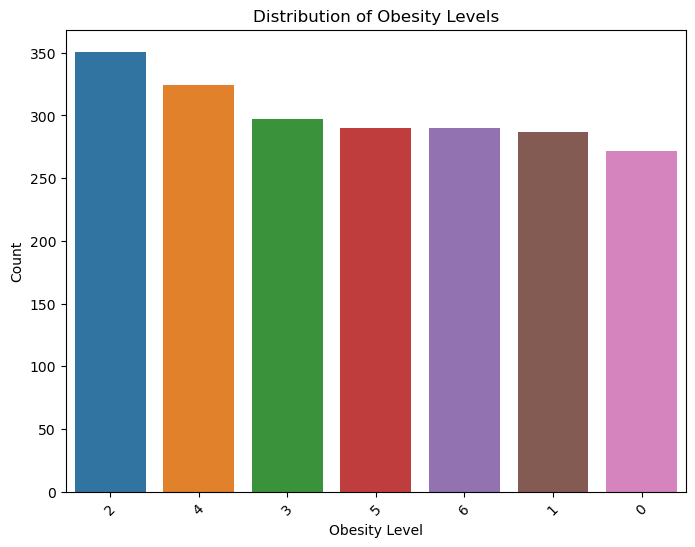

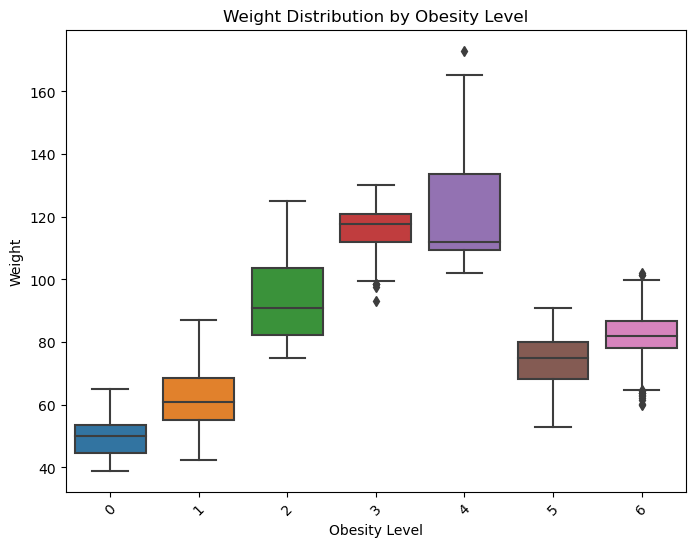

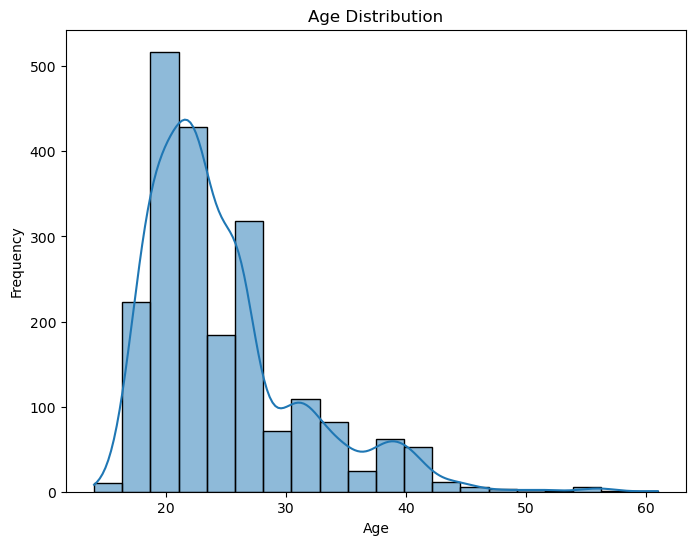

<Figure size 800x600 with 0 Axes>

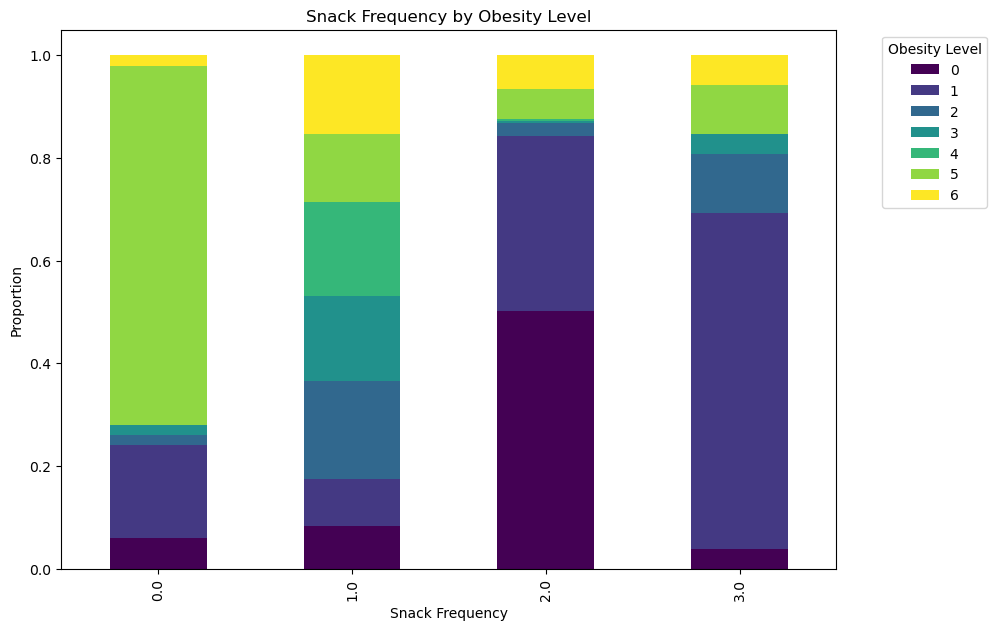

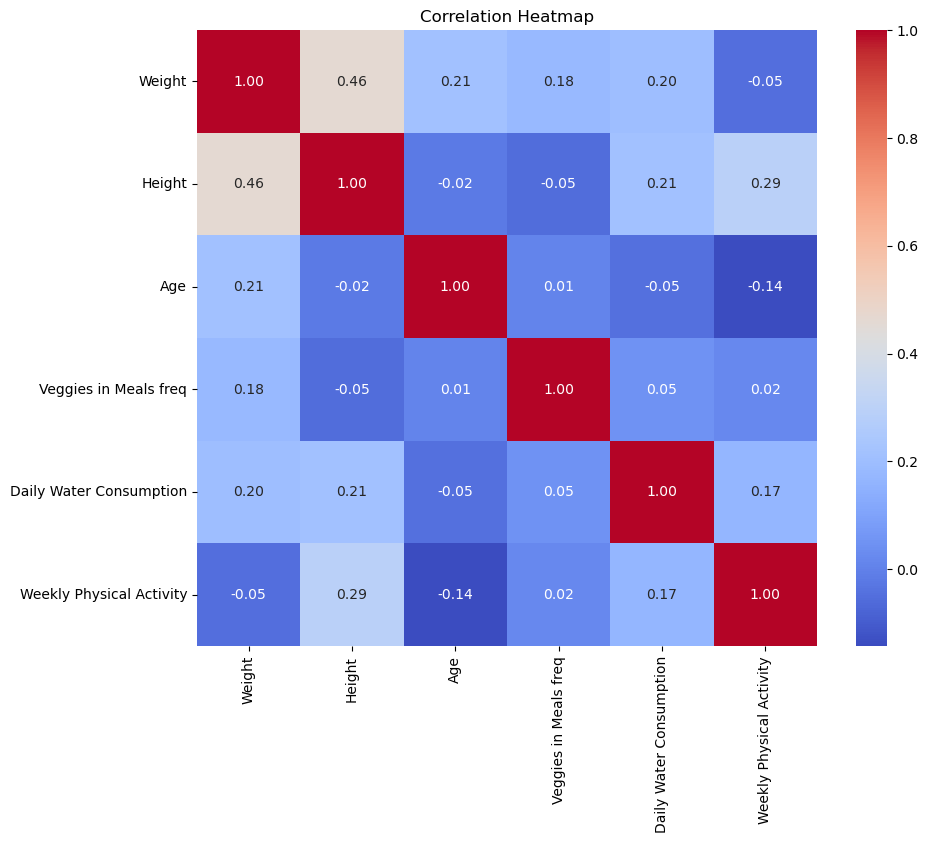

In [90]:
import seaborn as sns

# Bar chart: Distribution of obesity levels
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Obesity level', order=data['Obesity level'].value_counts().index)
plt.title('Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Box plot: Weight vs. Obesity Level
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Obesity level', y='Weight')
plt.title('Weight Distribution by Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.show()

# Histogram: Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Stacked bar chart: Snack Frequency by Obesity Level
plt.figure(figsize=(8, 6))
snack_freq_obesity = pd.crosstab(data['Snack Frequency'], data['Obesity level'], normalize='index')
snack_freq_obesity.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
plt.title('Snack Frequency by Obesity Level')
plt.xlabel('Snack Frequency')
plt.ylabel('Proportion')
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1))
plt.show()

# Heatmap: Correlation among numerical features
numerical_columns = ['Weight', 'Height', 'Age', 'Veggies in Meals freq', 'Daily Water Consumption', 'Weekly Physical Activity']
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


i use obesity level as the main variable because it is the target variable im trying to predict. the distributions overall look good.

In [69]:
#check all categorical data
categorical_columns = [col for col in data.columns if data[col].dtype == 'object']
categorical_columns

['Gender',
 'family_history_with_overweight',
 'High Calorie Meal Freq',
 'Snack Frequency',
 'Smoking',
 'Alcohol',
 'Transportation',
 'Obesity level']

In [70]:
labelcols = [col for col in categorical_columns if col != 'Alcohol' and col != 'Snack Frequency']
ordinalcols = ['Alcohol', 'Snack Frequency'] #pake ordinal krn rata" jawabannya itu" aja
labelcols

['Gender',
 'family_history_with_overweight',
 'High Calorie Meal Freq',
 'Smoking',
 'Transportation',
 'Obesity level']

In [71]:
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder(categories=[['Never', 'Sometimes', 'Frequently', 'Always']])

for col in labelcols:
    data[col] = label_encoder.fit_transform(data[col])

for col in ordinalcols:
    data[col] = ordinal_encoder.fit_transform(data[[col]]) 

In [72]:
X = data.drop(columns='Obesity level')
y = data['Obesity level']

# Split data into training and testing sets with a larger test size for better evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the shape of the training and testing sets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(1583, 14) (1583,)
(528, 14) (528,)


MODELLING

In [77]:
#XGBoost
xgb_params = {
    'n_estimators': [100, 200, 300],  #range of estimators for better results
    'max_depth': [3, 5, 7],           #max depth for tree complexity
    'learning_rate': [0.01, 0.05, 0.1], #learning rate for model training
}

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

#set up GridSearchCV for hyperparameter tuning
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, verbose=1, n_jobs=-1)

#fit the model with the training data
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [78]:
#random forest
rf_params = {
    'n_estimators': [200, 300, 500],  #increased number of estimators for better performance
    'max_depth': [10, 20, 30],         #max depth to prevent overfitting while allowing enough complexity
    'min_samples_split': [5, 10, 20],  #reduced min_samples_split to help with overfitting
}

rf_model = RandomForestClassifier(random_state=42)

#use GridSearchCV for hyperparameter tuning
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

#fit the model to training data
rf_grid.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [200, 300, 500]},
             scoring='accuracy', verbose=1)

EVALUATION

In [80]:
print("Optimal Parameters for XGBoost:", xgb_grid.best_params_)

#generate predictions using the best XGBoost model on the test data
y_pred_xgb = xgb_grid.best_estimator_.predict(X_test)

#print a detailed classification report for the XGBoost model
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Optimal Parameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        68
           1       0.93      0.87      0.90        78
           2       0.98      0.97      0.97        94
           3       0.97      0.99      0.98        75
           4       1.00      0.99      0.99        79
           5       0.90      0.92      0.91        71
           6       0.95      0.97      0.96        63

    accuracy                           0.95       528
   macro avg       0.95      0.95      0.95       528
weighted avg       0.95      0.95      0.95       528



In [81]:
print("Optimal Parameters for Random Forest:", rf_grid.best_params_)

#generate predictions 
y_pred_rf = rf_grid.best_estimator_.predict(X_test)

#print a detailed classification report for the Random Forest model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Optimal Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        68
           1       0.84      0.92      0.88        78
           2       0.99      0.97      0.98        94
           3       0.95      0.99      0.97        75
           4       1.00      0.99      0.99        79
           5       0.92      0.86      0.89        71
           6       0.95      0.95      0.95        63

    accuracy                           0.95       528
   macro avg       0.95      0.95      0.95       528
weighted avg       0.95      0.95      0.95       528



In [82]:
def evaluate_model(y_true, y_pred):
    #calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    #print metrics
    print(f"Accuracy:  {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall:    {recall:.2f}")
    print(f"F1-Score:  {f1:.2f}\n")

#evaluate the XGBoost model
evaluate_model(y_test, y_pred_xgb)

Accuracy:  0.95
Precision: 0.95
Recall:    0.95
F1-Score:  0.95



In [87]:
# Evaluate the XGBoost model
print(f"XGBoost Evaluation: ")
{evaluate_model(y_test, y_pred_xgb)}
# Evaluate the Random Forest model
print(f"Random Forest Evaluation: ")
{evaluate_model(y_test, y_pred_rf)}

XGBoost Evaluation: 
Accuracy:  0.95
Precision: 0.95
Recall:    0.95
F1-Score:  0.95

Random Forest Evaluation: 
Accuracy:  0.95
Precision: 0.95
Recall:    0.95
F1-Score:  0.95



{None}

both models are equally well, but it is better to use XGBoost because from the evaluation metrics, it has better precision and F1-score

<Figure size 1200x600 with 0 Axes>

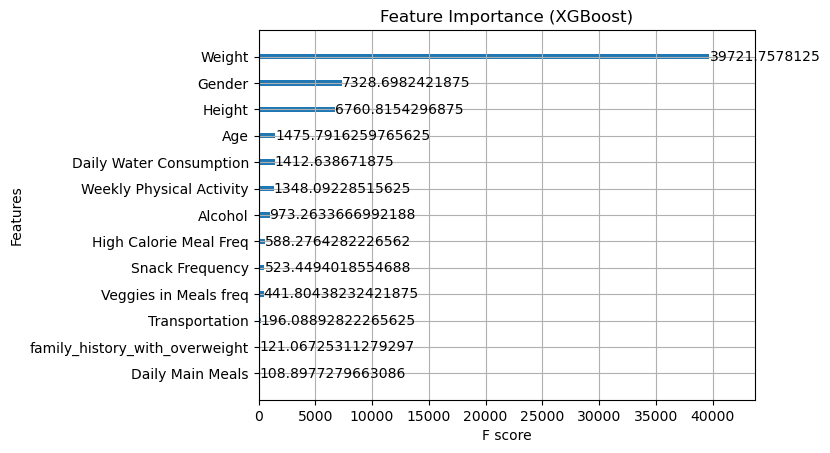

In [91]:
xgb_best_model = xgb_grid.best_estimator_

#plot feature importance
plt.figure(figsize=(12, 6))
plot_importance(xgb_best_model, importance_type='total_gain')
plt.title("Feature Importance (XGBoost)")
plt.show()
